<a href="https://colab.research.google.com/github/cateto/python4NLP/blob/main/20220919/%EC%A3%BC%EC%A0%9C%EB%B6%84%EB%A5%98(model_v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import os
abs_path = '/content/drive/MyDrive/DL/topic_class_POC'
dir_arr = os.listdir(abs_path)

In [3]:
dir_arr

['data_20220117_1.xlsx',
 'data_201005.xlsx',
 'data_20210507.xlsx',
 'pr_report_data_20220117_1.xlsx.html',
 'pr_report_data_201005.xlsx.html',
 'pr_report_data_20210507.xlsx.html',
 'pr_report_data_20220117_1.xlsx.html의 사본',
 'lucy_topic_test_v1.0.csv',
 'lucy_topic_train_v1.0.csv',
 'source',
 'lucy_topic_train_v2.0.csv',
 'lucy_topic_test_v2.0.csv']

In [4]:
latest_data_path = os.path.join(abs_path,dir_arr[0])

latest_data = pd.read_excel(latest_data_path)

In [5]:
len(latest_data)

25196

In [6]:
latest_data = latest_data.drop_duplicates() #중복제거
len(latest_data)

25196

In [7]:
latest_data.head()

,No,채널,수집일시,주제 대분류,주제 소분류,제목,내용,URL,사이트명,보드명,주제단어,작업자,검토결과,오분류 유형,비고
0,1,언론,20211130,정치,정책,전남 앞바다 함께 계획하고 이용해요,해양공간관리계획 공청회 열어 주민·전문가 의견 수렴 \n ▲ 전남도청 [전남/스...,http://www.startnews.co.kr/news/articleView.ht...,스타트뉴스,전국 전남 장성군,"공청회,공청회,공청회,공청회",신효성,1,NaN,NaN
1,2,언론,20211130,정치,정책,"도송중, 구미 청소년 JTS, 최우수상 쾌거","[구미뉴스]=구미청소년JTS동아리 (도송중 3학년 김민재, 노희수, 류혜림, 박수연...",http://www.guminews.co.kr/bbs/board.php?bo_tab...,구미뉴스,교육,"사회 정책,정책제안,정책제안",신효성,1,NaN,NaN
2,3,언론,20211130,정치,정책,"새로운대전위원회, 대전의 새로운 미래를 논하다","정형근 기자 = 대전시는 30일, 대전평생교육진흥원에서 공직자와 새로운대전위원회 위...",https://www.khousenews.com/news/124119,한국부동산종합뉴스,통합뉴스,"정책위원회,정책방향,정책방향,청년정책,주요시책,자문 역할 수행",신효성,1,NaN,NaN
3,4,언론,20211130,정치,정책,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상",[경상매일신문=조영삼기자]울릉중학교가 경상북도 교육청에서 최근 개최한 ‘청소년 사회...,http://www.ksmnews.co.kr/default/index_view_pa...,경상매일,뉴스> 뉴스,"정책제안,정책제안,정책박람회,정책제안",신효성,1,NaN,NaN
4,5,언론,20211130,정치,정책,"대구시, 전국 최초 대중교통 마일리지제도 시행",대구시 제공 \n[경상매일신문=김영식기자] 대구시가 내년에 새로운 승용차요일...,http://www.ksmnews.co.kr/default/index_view_pa...,경상매일,뉴스> 정치/행정,"승용차요일제,승용차요일제,승용차요일제,승용차요일제,승용차요일제,승용차요일제,지역 화...",신효성,1,NaN,NaN


In [8]:
lastest_data = latest_data.dropna(how='all', subset=['제목', '내용'])
len(latest_data)

25196

In [9]:
second_data_path = os.path.join(abs_path,dir_arr[1])

second_data = pd.read_excel(second_data_path)

In [10]:
second_data.head()

,문서번호,일자,제목,내용,주제 1순위,주제어,링크,출처,검토결과,오분류 유형
0,UT000000007798724050,20200903,"DSLR, 뭐가 좋은거지? / 이벤트픽이 쓰는 카메라! #니콘 #캐논 #행사전문스튜디오","안녕하세요, 이벤트픽입니다 :) 이번 영상은 카메라 기종에 대해, 어떤 카메라가 좋...",가전,"DSLR,카메라,카메라,카메라",https://www.youtube.com/watch?v=nVeT8W8rlBA,NaN,1,NaN
1,QA000000007798712796,20200903,멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1회만 결재되는거 맞...,내공100 \n 멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1...,가전,MP3,https://kin.naver.com/qna/detail.nhn?d1id=1&di...,NaN,1,NaN
2,TW1301533065143967745,20200903,가습기 쓰는 사람..................잇으면 추천좀,NaN,가전,가습기,https://twitter.com/Bin_527/status/13015330651...,NaN,1,NaN
3,TW1301534522253565952,20200903,최신가전 파격 지원! 낸 돈은 전액 그대로 100% 환급. https://t.co/...,NaN,가전,가전,https://twitter.com/keyanimater/status/1301534...,NaN,1,NaN
4,CF000000007798713901,20200903,[질문] 126동(1/2호라인) 9월 입주예정일 문의,"저희가 9월 26일 입주예정이고,\n\n새로 구입한 가구나 가전 등이 9월19일에 ...",가전,가전,https://cafe.naver.com/marineaesiang2020/2426,NaN,1,NaN


In [11]:
second_data = second_data.drop_duplicates() #중복제거
print(len(second_data))
second_data = second_data.dropna(how='all', subset=['제목', '내용']) #결측치제거
print(len(second_data))

15664
15664


In [12]:
third_data_path = os.path.join(abs_path,dir_arr[2])

third_data = pd.read_excel(third_data_path)

In [13]:
third_data.head()

,No,문서번호,일자,제목,내용,주제 대분류,주제 소분류,주제어,연관어,감성,링크,작업자,검토결과
0,970,DC000000008462043601,20210303,근데 이거봐 ㅋㅋㅋㅋ 친문에서 유시민 대선 부추기나봐,https://n.news.naver.com/article/025/000308144...,정치,정당,이재명,"유시민,대선,이재명",중립,https://www.fmkorea.com/3428613131,은승현,1
1,971,DC000000008462043611,20210303,유시민이 대선안나가더라도 이재명견제용으로 나올순잇다봄,친문 새후보한테 지지율 높혀서 전달할 중간다리 이런용도로 이재명한테 안밀리는네임드중...,정치,정당,"지지율,이재명","유시민,네임,대선,지지율,이재명",중립,https://www.fmkorea.com/3428620439,은승현,1
2,972,DC000000008462043564,20210303,대전 세종쪽은 윤석열 나오면 누구 뽑을지 궁금하다,현재는 싹다 민주당 올킬인데 \n윤석열 나오면 어캐 되려나 \n출신 대통령 vs 그...,정치,정당,민주당,"대전,민주당,세종,윤석열,올킬,대통령",중립,https://www.fmkorea.com/3428581763,은승현,1
3,973,DC000000008462043686,20210303,내가 진보 좋아하면서 졸라 싫어하는 이유,1.진보지향하는새끼들 보면 거의 대부분\n잘난척이 하늘을 찌름\n인간의 허영심중에 ...,정치,정당,"민주당,진보","민주당,허영,ㅉㅉ,허영심,불합리,증거,이새끼,좋아하다,충성,지적하다,답답,멍청,생각",부정,https://www.fmkorea.com/3428650664,은승현,1
4,974,DC000000008462043569,20210303,"코로나 끝난 후, 민주당의 변명 예상.",코로나가 끝날 줄 몰랐으니까 독재를 했다.\n이럴듯,정치,정당,민주당,"독재,변명,민주당,코로나19",부정,https://www.fmkorea.com/3428584602,은승현,1


In [14]:
third_data = third_data.drop_duplicates() #중복제거
print(len(third_data))
third_data = third_data.dropna(how='all', subset=['제목', '내용']) #결측치제거
print(len(third_data))

17090
17090


In [15]:
col_name = ['contents', 'topic_rule', 'topic_human']

In [16]:
inter_data = pd.DataFrame(columns=col_name)

In [17]:
inter_data

,contents,topic_rule,topic_human


In [18]:
lastest_data['contents'] = -1
lastest_data['contents'] = latest_data[['제목','내용']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [19]:
lastest_data['topic_rule'] = -1
lastest_data['topic_rule'] = latest_data['주제 소분류']
lastest_data['topic_human'] = -1

In [20]:
lastest_data.head()

,No,채널,수집일시,주제 대분류,주제 소분류,제목,내용,URL,사이트명,보드명,주제단어,작업자,검토결과,오분류 유형,비고,contents,topic_rule,topic_human
0,1,언론,20211130,정치,정책,전남 앞바다 함께 계획하고 이용해요,해양공간관리계획 공청회 열어 주민·전문가 의견 수렴 \n ▲ 전남도청 [전남/스...,http://www.startnews.co.kr/news/articleView.ht...,스타트뉴스,전국 전남 장성군,"공청회,공청회,공청회,공청회",신효성,1,NaN,NaN,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,-1
1,2,언론,20211130,정치,정책,"도송중, 구미 청소년 JTS, 최우수상 쾌거","[구미뉴스]=구미청소년JTS동아리 (도송중 3학년 김민재, 노희수, 류혜림, 박수연...",http://www.guminews.co.kr/bbs/board.php?bo_tab...,구미뉴스,교육,"사회 정책,정책제안,정책제안",신효성,1,NaN,NaN,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,-1
2,3,언론,20211130,정치,정책,"새로운대전위원회, 대전의 새로운 미래를 논하다","정형근 기자 = 대전시는 30일, 대전평생교육진흥원에서 공직자와 새로운대전위원회 위...",https://www.khousenews.com/news/124119,한국부동산종합뉴스,통합뉴스,"정책위원회,정책방향,정책방향,청년정책,주요시책,자문 역할 수행",신효성,1,NaN,NaN,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,-1
3,4,언론,20211130,정치,정책,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상",[경상매일신문=조영삼기자]울릉중학교가 경상북도 교육청에서 최근 개최한 ‘청소년 사회...,http://www.ksmnews.co.kr/default/index_view_pa...,경상매일,뉴스> 뉴스,"정책제안,정책제안,정책박람회,정책제안",신효성,1,NaN,NaN,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,-1
4,5,언론,20211130,정치,정책,"대구시, 전국 최초 대중교통 마일리지제도 시행",대구시 제공 \n[경상매일신문=김영식기자] 대구시가 내년에 새로운 승용차요일...,http://www.ksmnews.co.kr/default/index_view_pa...,경상매일,뉴스> 정치/행정,"승용차요일제,승용차요일제,승용차요일제,승용차요일제,승용차요일제,승용차요일제,지역 화...",신효성,1,NaN,NaN,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,-1


In [21]:
inter_data = inter_data.append(lastest_data[col_name], ignore_index = True)

In [22]:
inter_data

,contents,topic_rule,topic_human
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,-1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,-1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,-1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,-1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,-1
...,...,...,...
25191,비맥스녹십자 Pow7.kr 비맥스녹십자 Pow7.kr\t\n작성자 카톡EXXE\n\...,바이오,-1
25192,센트리가격「카톡EXXE」 센트리가격「카톡EXXE」\t\n작성자 카톡EXXE\n\t\...,바이오,-1
25193,레비트라가격 레비트라가격\t\n작성자 카톡EXXE\n\t\n작성일 2021-11-2...,바이오,-1
25194,카마그라젤 XXA.KR 카마그라젤 XXA.KR\t\n작성자 카톡EXXE\n\t\n작...,바이오,-1


In [23]:
second_data['contents'] = -1
second_data['contents'] = second_data[['제목','내용']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [24]:
second_data['topic_rule'] = -1
second_data['topic_rule'] = second_data['주제 1순위']
second_data['topic_human'] = -1

In [25]:
second_data.head()

,문서번호,일자,제목,내용,주제 1순위,주제어,링크,출처,검토결과,오분류 유형,contents,topic_rule,topic_human
0,UT000000007798724050,20200903,"DSLR, 뭐가 좋은거지? / 이벤트픽이 쓰는 카메라! #니콘 #캐논 #행사전문스튜디오","안녕하세요, 이벤트픽입니다 :) 이번 영상은 카메라 기종에 대해, 어떤 카메라가 좋...",가전,"DSLR,카메라,카메라,카메라",https://www.youtube.com/watch?v=nVeT8W8rlBA,NaN,1,NaN,"DSLR, 뭐가 좋은거지? / 이벤트픽이 쓰는 카메라! #니콘 #캐논 #행사전문스튜...",가전,-1
1,QA000000007798712796,20200903,멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1회만 결재되는거 맞...,내공100 \n 멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1...,가전,MP3,https://kin.naver.com/qna/detail.nhn?d1id=1&di...,NaN,1,NaN,멜론 mp3 30개 다운 정기결재 신청하고 바로 해지하면 이번 1회만 결재되는거 맞...,가전,-1
2,TW1301533065143967745,20200903,가습기 쓰는 사람..................잇으면 추천좀,NaN,가전,가습기,https://twitter.com/Bin_527/status/13015330651...,NaN,1,NaN,가습기 쓰는 사람..................잇으면 추천좀 nan,가전,-1
3,TW1301534522253565952,20200903,최신가전 파격 지원! 낸 돈은 전액 그대로 100% 환급. https://t.co/...,NaN,가전,가전,https://twitter.com/keyanimater/status/1301534...,NaN,1,NaN,최신가전 파격 지원! 낸 돈은 전액 그대로 100% 환급. https://t.co/...,가전,-1
4,CF000000007798713901,20200903,[질문] 126동(1/2호라인) 9월 입주예정일 문의,"저희가 9월 26일 입주예정이고,\n\n새로 구입한 가구나 가전 등이 9월19일에 ...",가전,가전,https://cafe.naver.com/marineaesiang2020/2426,NaN,1,NaN,[질문] 126동(1/2호라인) 9월 입주예정일 문의 저희가 9월 26일 입주예정이...,가전,-1


In [26]:
inter_data = inter_data.append(second_data[col_name], ignore_index = True)

In [27]:
inter_data

,contents,topic_rule,topic_human
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,-1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,-1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,-1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,-1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,-1
...,...,...,...
40855,홈캉스를 더 빛나게 하는 인천 아파트 유리창 청소☆영종힐스테이트아파트☆ 안녕하세요\...,환경오염,-1
40856,@_listk 불끄고 티비보면 눈 나빠져여~!! (황사때 세차하면 기스나여 톤으로)...,환경오염,-1
40857,황사빼기재밋어 https://t.co/qDDj2IWLXI nan,환경오염,-1
40858,생각만 해도 행복하다.. 역시 난 가을 겨울이 좋은 fw 인간이야 봄엔 황사 때문에...,환경오염,-1


In [28]:
third_data['contents'] = -1
third_data['contents'] = third_data[['제목','내용']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [29]:
third_data['topic_rule'] = -1
third_data['topic_rule'] = third_data['주제 소분류']
third_data['topic_human'] = -1

In [30]:
third_data.head()

,No,문서번호,일자,제목,내용,주제 대분류,주제 소분류,주제어,연관어,감성,링크,작업자,검토결과,contents,topic_rule,topic_human
0,970,DC000000008462043601,20210303,근데 이거봐 ㅋㅋㅋㅋ 친문에서 유시민 대선 부추기나봐,https://n.news.naver.com/article/025/000308144...,정치,정당,이재명,"유시민,대선,이재명",중립,https://www.fmkorea.com/3428613131,은승현,1,근데 이거봐 ㅋㅋㅋㅋ 친문에서 유시민 대선 부추기나봐 https://n.news.n...,정당,-1
1,971,DC000000008462043611,20210303,유시민이 대선안나가더라도 이재명견제용으로 나올순잇다봄,친문 새후보한테 지지율 높혀서 전달할 중간다리 이런용도로 이재명한테 안밀리는네임드중...,정치,정당,"지지율,이재명","유시민,네임,대선,지지율,이재명",중립,https://www.fmkorea.com/3428620439,은승현,1,유시민이 대선안나가더라도 이재명견제용으로 나올순잇다봄 친문 새후보한테 지지율 높혀서...,정당,-1
2,972,DC000000008462043564,20210303,대전 세종쪽은 윤석열 나오면 누구 뽑을지 궁금하다,현재는 싹다 민주당 올킬인데 \n윤석열 나오면 어캐 되려나 \n출신 대통령 vs 그...,정치,정당,민주당,"대전,민주당,세종,윤석열,올킬,대통령",중립,https://www.fmkorea.com/3428581763,은승현,1,대전 세종쪽은 윤석열 나오면 누구 뽑을지 궁금하다 현재는 싹다 민주당 올킬인데 \n...,정당,-1
3,973,DC000000008462043686,20210303,내가 진보 좋아하면서 졸라 싫어하는 이유,1.진보지향하는새끼들 보면 거의 대부분\n잘난척이 하늘을 찌름\n인간의 허영심중에 ...,정치,정당,"민주당,진보","민주당,허영,ㅉㅉ,허영심,불합리,증거,이새끼,좋아하다,충성,지적하다,답답,멍청,생각",부정,https://www.fmkorea.com/3428650664,은승현,1,내가 진보 좋아하면서 졸라 싫어하는 이유 1.진보지향하는새끼들 보면 거의 대부분\n...,정당,-1
4,974,DC000000008462043569,20210303,"코로나 끝난 후, 민주당의 변명 예상.",코로나가 끝날 줄 몰랐으니까 독재를 했다.\n이럴듯,정치,정당,민주당,"독재,변명,민주당,코로나19",부정,https://www.fmkorea.com/3428584602,은승현,1,"코로나 끝난 후, 민주당의 변명 예상. 코로나가 끝날 줄 몰랐으니까 독재를 했다.\...",정당,-1


In [31]:
inter_data = inter_data.append(third_data[col_name], ignore_index = True)

In [32]:
inter_data

,contents,topic_rule,topic_human
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,-1
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,-1
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,-1
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,-1
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,-1
...,...,...,...
57945,전북 뿌리·농기계 기술 고도화 지원 본격 가동 □ 전라북도가 주력산업의 근간이 되는...,금융/금리,-1
57946,"주상하이총영사, 주재국 언론(제일재경(第一財經)) 인터뷰 □ 매체 및 기고 일시 :...",금융/금리,-1
57947,2021년 1월 수출입 무역 동향 (관할지역 5개현) ※ 주히로시마총영사관 관할지역...,금융/금리,-1
57948,4차 재난지원금 집합제한업종에 매출비교는 너무 잔인하고 불공정합니다. 오늘 기획재정...,금융/금리,-1


In [33]:
inter_data.loc[inter_data['topic_rule'] == '공연,전시','topic_rule'] = '공연/전시'

In [34]:
inter_data.loc[inter_data['topic_rule'] == '금융 / 금리','topic_rule'] = '금융/금리'
inter_data.loc[inter_data['topic_rule'] == '금융,금리','topic_rule'] = '금융/금리'

In [35]:
inter_data.loc[inter_data['topic_rule'] == '스포츠 일반','topic_rule'] = '스포츠일반'

In [36]:
inter_data.loc[inter_data['topic_rule'] == '여행,레저','topic_rule'] = '여행/레저'

In [37]:
inter_data.loc[inter_data['topic_rule'] == '유통,쇼핑,물류','topic_rule'] = '유통/쇼핑/물류'

In [38]:
inter_data.loc[inter_data['topic_rule'] == '취미,반려동물,라이프스타일','topic_rule'] = '취미/반려동물/라이프스타일'
inter_data.loc[inter_data['topic_rule'] == '취미/반려동물/라이프 스타일','topic_rule'] = '취미/반려동물/라이프스타일'

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(inter_data['topic_rule'])
inter_data['topic_human'] = encoder.transform(inter_data['topic_rule'])

In [40]:
# print labels
labels = []
for i, label in enumerate(encoder.classes_):
    labels.append({'label_id' : i, 'label_name': label})
    print(i, '->', label)

0 -> 가전
1 -> 건설
2 -> 게임
3 -> 골프
4 -> 공연/전시
5 -> 교육
6 -> 국방안보
7 -> 금융/금리
8 -> 농구
9 -> 다문화
10 -> 도서
11 -> 레져산업
12 -> 모바일
13 -> 바이오
14 -> 반도체
15 -> 방송
16 -> 배구
17 -> 법조
18 -> 보건복지
19 -> 부동산
20 -> 사건사고
21 -> 석유
22 -> 스포츠일반
23 -> 식품
24 -> 야구
25 -> 에너지
26 -> 여행/레저
27 -> 연예일반
28 -> 영화
29 -> 외교
30 -> 유통/쇼핑/물류
31 -> 음식
32 -> 음악
33 -> 의료
34 -> 인터넷
35 -> 자동차
36 -> 재해
37 -> 전자
38 -> 정당
39 -> 정부
40 -> 정책
41 -> 제철
42 -> 종교
43 -> 증권
44 -> 지자체
45 -> 축구
46 -> 취미/반려동물/라이프스타일
47 -> 친환경
48 -> 컴퓨터
49 -> 통신
50 -> 패션
51 -> 화학
52 -> 환경오염


In [41]:
labels

[{'label_id': 0, 'label_name': '가전'},
 {'label_id': 1, 'label_name': '건설'},
 {'label_id': 2, 'label_name': '게임'},
 {'label_id': 3, 'label_name': '골프'},
 {'label_id': 4, 'label_name': '공연/전시'},
 {'label_id': 5, 'label_name': '교육'},
 {'label_id': 6, 'label_name': '국방안보'},
 {'label_id': 7, 'label_name': '금융/금리'},
 {'label_id': 8, 'label_name': '농구'},
 {'label_id': 9, 'label_name': '다문화'},
 {'label_id': 10, 'label_name': '도서'},
 {'label_id': 11, 'label_name': '레져산업'},
 {'label_id': 12, 'label_name': '모바일'},
 {'label_id': 13, 'label_name': '바이오'},
 {'label_id': 14, 'label_name': '반도체'},
 {'label_id': 15, 'label_name': '방송'},
 {'label_id': 16, 'label_name': '배구'},
 {'label_id': 17, 'label_name': '법조'},
 {'label_id': 18, 'label_name': '보건복지'},
 {'label_id': 19, 'label_name': '부동산'},
 {'label_id': 20, 'label_name': '사건사고'},
 {'label_id': 21, 'label_name': '석유'},
 {'label_id': 22, 'label_name': '스포츠일반'},
 {'label_id': 23, 'label_name': '식품'},
 {'label_id': 24, 'label_name': '야구'},
 {'label_id':

In [42]:
temp_df = pd.DataFrame(labels)

In [43]:
temp_df.to_csv('topic_label.csv',  index=False, encoding="utf-8-sig")

In [44]:
inter_data

,contents,topic_rule,topic_human
0,전남 앞바다 함께 계획하고 이용해요 해양공간관리계획 공청회 열어 주민·전문가 의견 ...,정책,40
1,"도송중, 구미 청소년 JTS, 최우수상 쾌거 [구미뉴스]=구미청소년JTS동아리 (도...",정책,40
2,"새로운대전위원회, 대전의 새로운 미래를 논하다 정형근 기자 = 대전시는 30일, 대...",정책,40
3,"울릉중, 청소년 사회 참여 및 정책제안 공모전 우수상 [경상매일신문=조영삼기자]울릉...",정책,40
4,"대구시, 전국 최초 대중교통 마일리지제도 시행 대구시 제공 \n[경상매일신문...",정책,40
...,...,...,...
57945,전북 뿌리·농기계 기술 고도화 지원 본격 가동 □ 전라북도가 주력산업의 근간이 되는...,금융/금리,7
57946,"주상하이총영사, 주재국 언론(제일재경(第一財經)) 인터뷰 □ 매체 및 기고 일시 :...",금융/금리,7
57947,2021년 1월 수출입 무역 동향 (관할지역 5개현) ※ 주히로시마총영사관 관할지역...,금융/금리,7
57948,4차 재난지원금 집합제한업종에 매출비교는 너무 잔인하고 불공정합니다. 오늘 기획재정...,금융/금리,7


In [45]:
train, test = train_test_split(inter_data, test_size=0.2, random_state=42)

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 2 , test_size = 0.2, random_state = 42)
for train_idx, test_idx in split.split(inter_data, inter_data["topic_human"]):
  df_strat_train = inter_data.loc[train_idx]
  df_strat_test = inter_data.loc[test_idx]

In [47]:
inter_data["topic_human"].value_counts() / len(inter_data) # dataset 라벨 비율

39    0.022209
27    0.022140
5     0.022071
32    0.021795
18    0.021570
40    0.021519
10    0.021398
46    0.021242
42    0.021191
13    0.020880
36    0.020414
50    0.020397
9     0.020380
38    0.020311
2     0.020276
43    0.020242
28    0.020155
17    0.020000
33    0.019948
11    0.019931
4     0.019810
19    0.019707
34    0.019689
23    0.019672
44    0.019655
25    0.019551
52    0.019275
47    0.019258
37    0.019206
30    0.019154
26    0.019068
0     0.018982
6     0.018878
24    0.018671
31    0.018637
22    0.017877
15    0.017774
1     0.017757
3     0.017532
45    0.017515
7     0.017463
29    0.017135
51    0.016376
48    0.016169
21    0.015997
20    0.015962
8     0.015651
12    0.015427
35    0.015255
14    0.015237
41    0.014909
16    0.014392
49    0.014288
Name: topic_human, dtype: float64

In [48]:
df_strat_train

,contents,topic_rule,topic_human
11306,부산철거YM 젊은청년산업개발- 국민연금빌딩 철거 3일차 . 젊은청년 산업개발 유능한...,건설,1
660,근데 들어봐요\n한쪽은 규칙따위 상관없는 미친놈이고\n한쪽은 정부마피아라 모든 마피...,정부,39
47516,"초등 5,6학년되면 보통 예체능학원을 그만두는데요. 전공하는게 아닌데도 계속 다니고...",교육,5
56815,➰ #113 ♡♡. ℝ♡♡ 세림아~~~ 안녀엉(｡ • ‧̫ • ｡)੭❤︎\n카에데가...,음식,31
21935,"new 캠프마켓 땅, 다이옥신 정화 완료 외 [인천일보기사보기]캠프마켓 땅, 다이옥...",재해,36
...,...,...,...
25826,아미동유품정리 동구이사폐기물처리 충무동폐가구수거하는곳 중구폐기물... 위치아미동 주...,건설,1
54771,폭스콘+피스커 대만 폭스콘과 손잡으면서 '애플카'의 유력 생산 파트너로 떠오른 미국...,반도체,14
26655,● 제35회 맘앤베이비엑스포 (일산) 행사 잠정연기 안내 ● \n\n 맘앤베이비엑스...,공연/전시,4
30075,기업회생신청 개시 결정시 이뤄지는 취소 확정이란 법인회생절차에서 관리위원회는 회생계...,법조,17


In [49]:
df_strat_train["topic_human"].value_counts() / len(df_strat_train)

39    0.022217
27    0.022131
5     0.022066
32    0.021786
18    0.021570
40    0.021527
10    0.021398
46    0.021247
42    0.021182
13    0.020880
50    0.020406
36    0.020406
9     0.020384
38    0.020319
2     0.020276
43    0.020233
28    0.020147
17    0.019996
33    0.019953
11    0.019931
4     0.019823
19    0.019715
34    0.019694
23    0.019672
44    0.019651
25    0.019543
52    0.019284
47    0.019262
37    0.019198
30    0.019154
26    0.019068
0     0.018982
6     0.018874
24    0.018680
31    0.018637
22    0.017882
15    0.017774
1     0.017752
3     0.017537
45    0.017515
7     0.017472
29    0.017127
51    0.016372
48    0.016178
21    0.016005
20    0.015962
8     0.015660
12    0.015423
35    0.015250
14    0.015229
41    0.014905
16    0.014387
49    0.014280
Name: topic_human, dtype: float64

In [50]:
train

,contents,topic_rule,topic_human
33815,김정은이 반역자로 몰던 ‘강화도 수영 월북자’를 용서한 이유 김씨가 탈출로로 이용한...,외교,29
13293,“언제까지 이렇게 뚱뚱한 지갑을 들고 다녀야 하지?”수많은 직원들의 고민 끝에 탄생...,금융/금리,7
13744,유진 역시 남다른 손재주와 파워를 가진 만능캐였는데요.#해치지않아 ‘해치지 않아’ ...,방송,15
10644,계약 인증합니다! ​\n\n​\n\n​\n\n​\n\n제네시스 GV70클럽 [순회원...,석유,21
46248,"'프로 다이어터' 박세리, 낮부터 삼겹살 먹방 ""고기는 살 안찜"" 사진=박세리 인스...",골프,3
...,...,...,...
54343,실전매매 두올 한빛소프트 한농화성 에스퓨얼셀 시초가매매 투매매매! 한숨 돌린 시장~...,화학,51
38158,@eunnybae @Ve7hF2yaXGWijwD 모르겠지만 완전 고점이 아니면 진짜...,증권,43
860,9급 지방직 일반행정공무원 2022년에 지원하고 싶은데 2022년되면 나이가 만17...,정부,39
15795,"2021.11.30. 가꿈 ""나들이"" < 한지연과 함께하는 THE가꿈 > 멘토인 대...",여행/레저,26


In [51]:
train["topic_human"].value_counts() / len(train)

39    0.022627
27    0.022110
5     0.022023
32    0.021915
18    0.021592
13    0.021247
42    0.021160
46    0.021160
40    0.021074
10    0.021009
50    0.020600
9     0.020557
28    0.020535
36    0.020406
43    0.020384
38    0.020125
25    0.019974
23    0.019953
2     0.019909
4     0.019823
17    0.019758
33    0.019694
44    0.019672
19    0.019586
34    0.019435
6     0.019305
26    0.019262
11    0.019198
30    0.019025
0     0.019025
47    0.019003
31    0.018960
52    0.018831
37    0.018658
24    0.018270
22    0.018033
1     0.018033
3     0.017839
7     0.017558
45    0.017494
15    0.017450
29    0.017256
51    0.016480
21    0.016307
20    0.016070
48    0.015919
12    0.015660
8     0.015293
14    0.015229
41    0.015121
35    0.015099
49    0.014689
16    0.014603
Name: topic_human, dtype: float64

In [52]:
test

,contents,topic_rule,topic_human
13378,한국은행 신권 교환 관련. 내년부터는 신권을 한국은행 신권 교환 관련. 내년부터는 ...,금융/금리,7
45083,"고양의 딸 홍지윤을 응원해 주세요 안녕하세요._x000D_\n우리 고양시의 딸, 홍...",연예일반,27
18528,담주에 할 거 추천 좀 담주 화욜까지 약속 있는데 성적표 금욜에 나오니까 수목 할거...,교육,5
27395,변종공매도가 기승인가보네 https://www1.president.go.kr/pet...,금융/금리,7
14165,‏ ♥︎ - ‏‎مُوضح اعلاه - : - ‏‎‏#TWICE #ONCE ...,연예일반,27
...,...,...,...
4911,직관가서단점...김연경경기생방못봄... nan,배구,16
49352,코스피 2560선까지 떨어진다?? (국내 증시 전망)\n -미국 금리 오르면 외국이...,증권,43
36995,세관땜에 또 일주일 참아야하네 ㅅㅂ 합산과세땜에 한주 늦게 보낸건데 \n\n또 늦어...,정부,39
16261,뇌전증 환자 진로 안녕하세요 저는 뇌전증을 앓고 있는 중학교 3학년 여학생인데요\n...,의료,33


In [53]:
test["topic_human"].value_counts() / len(test)

40    0.023296
10    0.022951
11    0.022865
27    0.022261
5     0.022261
2     0.021743
46    0.021570
18    0.021484
37    0.021398
32    0.021311
42    0.021311
38    0.021053
52    0.021053
33    0.020966
17    0.020966
34    0.020708
39    0.020535
36    0.020449
24    0.020276
47    0.020276
19    0.020190
4     0.019758
30    0.019672
43    0.019672
9     0.019672
44    0.019586
50    0.019586
13    0.019413
15    0.019068
0     0.018809
28    0.018637
23    0.018550
26    0.018292
25    0.017860
45    0.017601
31    0.017343
22    0.017256
6     0.017170
48    0.017170
7     0.017084
8     0.017084
1     0.016652
29    0.016652
3     0.016307
51    0.015962
35    0.015876
20    0.015531
14    0.015272
21    0.014754
12    0.014495
41    0.014064
16    0.013546
49    0.012683
Name: topic_human, dtype: float64

In [54]:
df_strat_test

,contents,topic_rule,topic_human
56292,아이패드 드로잉 귀멸의칼날 탄지로 훈련의모습입니다.,전자,37
41406,"자꾸 까먹어서.. ㅋㅋ 나갈때 까먹거나 손소독제, 마스크 같은 생필품 올려두니 편하...",취미/반려동물/라이프스타일,46
31496,K3리그 선수들 앞에서 풋살로 주름잡기 (추함주의) #청주FC #풋살 #혈압축구를 ...,스포츠일반,22
28110,ㅇㄱㄹㅇ\n어디가든 백인이 많은 곳은 피하는게 좋음\n인종차별을 직접적으로 당하거나...,다문화,9
54964,"""캠벨 조정관, 미중 기술경쟁서 한일 등 파트너에 더 역점"" ""캠벨 조정관, 미중 ...",반도체,14
...,...,...,...
14208,#송가인 관중석 안쪽까지 올라와서 열창! 강남 트롯페스타 축하공연 11월29일 nan,연예일반,27
49526,2021.3.3 수요일 나는 부동산에 근무하는 실장이야. 공인중개사가 내 직업이고...,부동산,19
22786,중국 후베이(湖北)성 우한(武漢)시에서 열린 '제1회 중국(우한) 문화·관광 박람회...,레져산업,11
22585,구봉산 전망대 - 광양 / 구례 여행 ( 1 ) ﻿\n​\n\n일시 : 2021.1...,레져산업,11


In [55]:
df_strat_test["topic_human"].value_counts() / len(df_strat_test)

39    0.022174
27    0.022174
5     0.022088
32    0.021829
18    0.021570
40    0.021484
10    0.021398
46    0.021225
42    0.021225
13    0.020880
36    0.020449
9     0.020362
50    0.020362
2     0.020276
43    0.020276
38    0.020276
28    0.020190
17    0.020017
33    0.019931
11    0.019931
4     0.019758
34    0.019672
44    0.019672
19    0.019672
23    0.019672
25    0.019586
47    0.019241
37    0.019241
52    0.019241
30    0.019154
26    0.019068
0     0.018982
6     0.018896
24    0.018637
31    0.018637
22    0.017860
1     0.017774
15    0.017774
45    0.017515
3     0.017515
7     0.017429
29    0.017170
51    0.016393
48    0.016135
21    0.015962
20    0.015962
8     0.015617
12    0.015444
35    0.015272
14    0.015272
41    0.014927
16    0.014409
49    0.014323
Name: topic_human, dtype: float64

In [56]:
train.to_csv(os.path.join(abs_path, 'lucy_topic_train_v1.0.csv'), index=False, encoding="utf-8-sig")

In [57]:
df_strat_train.to_csv(os.path.join(abs_path, 'lucy_topic_train_v2.0.csv'), index=False, encoding="utf-8-sig")

In [58]:
test.to_csv(os.path.join(abs_path, 'lucy_topic_test_v1.0.csv'), index=False, encoding="utf-8-sig")

In [59]:
df_strat_test.to_csv(os.path.join(abs_path, 'lucy_topic_test_v2.0.csv'), index=False, encoding="utf-8-sig")

한글 깨짐 해결

In [60]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

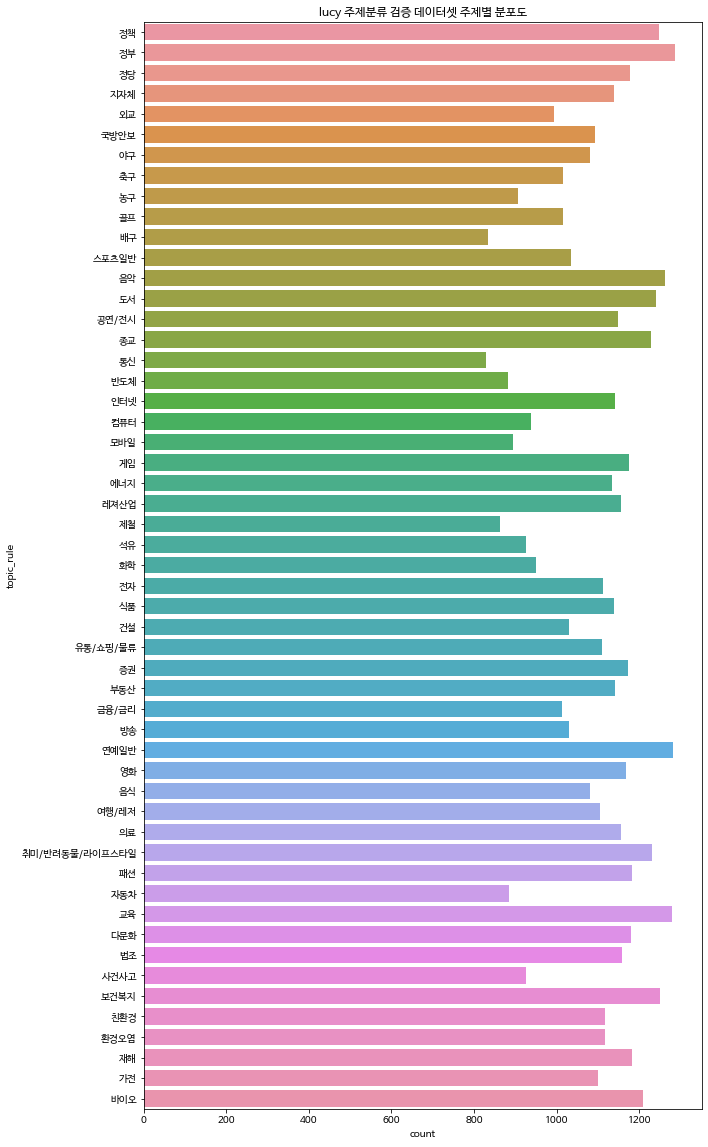

In [76]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
plt.rc('font', family='NanumBarunGothic') 
sns.countplot(y="topic_rule", data=inter_data)
plt.title("lucy 주제분류 검증 데이터셋 주제별 분포도")
plt.show()

In [ ]:
!pip install git+https://github.com/SKT-AI/KoBART#egg=kobart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKT-AI/KoBART to /tmp/pip-install-x1nq_q5p/kobart_1276500f4d5842a89d445dfc4692c09c
  Running command git clone -q https://github.com/SKT-AI/KoBART /tmp/pip-install-x1nq_q5p/kobart_1276500f4d5842a89d445dfc4692c09c
     |████████████████████████████████| 132 kB 4.8 MB/s 
     |████████████████████████████████| 814 kB 36.6 MB/s 
     |████████████████████████████████| 776.8 MB 18 kB/s 
     |████████████████████████████████| 1.9 MB 54.6 MB/s 
     |████████████████████████████████| 829 kB 62.4 MB/s 
     |████████████████████████████████| 880 kB 65.0 MB/s 
     |████████████████████████████████| 3.3 MB 54.3 MB/s 
     |████████████████████████████████| 79 kB 10.5 MB/s 
     |████████████████████████████████| 9.1 MB 50.7 MB/s 
     |████████████████████████████████| 127 kB 69.3 MB/s 
  Created wheel for kobart: filename=kobart-0.5.1-py3-none-any.whl size=9583 sha2

In [ ]:
!pip install torchtext==0.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 4.7 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1


In [ ]:
!python /content/drive/MyDrive/DL/topic_class_POC/source/lucy.py --gpus 1 --max_epochs 3 --default_root_dir .cache --gradient_clip_val 1.0

INFO:root:Namespace(accelerator=None, accumulate_grad_batches=1, amp_backend='native', amp_level='O2', auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, automatic_optimization=None, batch_size=6, benchmark=False, cachedir='/content/.cache', check_val_every_n_epoch=1, checkpoint_callback=True, default_root_dir='.cache', deterministic=False, distributed_backend=None, enable_pl_optimizer=None, fast_dev_run=False, flush_logs_every_n_steps=100, gpus=1, gradient_clip_val=1.0, limit_predict_batches=1.0, limit_test_batches=1.0, limit_train_batches=1.0, limit_val_batches=1.0, log_every_n_steps=50, log_gpu_memory=None, logger=True, lr=5e-05, max_epochs=3, max_seq_len=512, max_steps=None, min_epochs=None, min_steps=None, move_metrics_to_cpu=False, multiple_trainloader_mode='max_size_cycle', num_nodes=1, num_processes=1, num_sanity_val_steps=2, overfit_batches=0.0, plugins=None, precision=32, prepare_data_per_node=True, process_position=0, profiler=None, progress_bar_refresh

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Tue Sep 20 04:20:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    26W /  70W |    940MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------